<a href="https://colab.research.google.com/github/pinilDissanayaka/Election-Insight-App/blob/main/Notebook_manifesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 

In [2]:
import os
from pinecone import Pinecone, ServerlessSpec
from google.colab import userdata
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
from langchain_groq.chat_models import ChatGroq
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_experimental.text_splitter import SemanticChunker
from langchain.document_loaders import PyPDFLoader
from langchain_pinecone import PineconeVectorStore
from pydantic import BaseModel, Field
from typing import List, TypedDict
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate

In [4]:
os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')
os.environ['PINECONE_API_KEY']=userdata.get('PINECORN_API_KEY')
os.environ['GROQ_API_KEY']=userdata.get('GROQ_API_KEY')
os.environ['LANGCHAIN_API_KEY']=userdata.get('LANGCHAIN_API_KEY')
os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ["GOOGLE_API_KEY"]=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_PROJECT_ID"]=userdata.get('GOOGLE_PROJECT_ID')

In [ ]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=DQaveSgG4eK88mhiGqZDufh9170No2&prompt=consent&token_usage=remote&access_type=offline&code_challenge=4rOAHa2vttkdRqKQZZdZdeFnwHEFPIPK9CdtUR6yGfU&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AQlEd8z0Z_c5i3Zcc2hfooV8DafieNqR2X83Y8blTkW2dln3eIT__XEph-eAwmzF8ThUmQ

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [ ]:
model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}

embeddings=HuggingFaceEmbeddings(model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
embeddings=GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")

In [6]:
def load(path):
  print("=" * 60)
  manifesto_data=PyPDFLoader(path).load()
  print(f"Loaded documents {len(manifesto_data)}")
  print("=" * 60)
  return manifesto_data

def split(docs):
  doc_splits = RecursiveCharacterTextSplitter(
    chunk_size=1200,
    chunk_overlap=390,
    length_function=len,
    is_separator_regex=False,
  ).split_documents(docs)

  print(f"Split documents {len(doc_splits)}")

  return doc_splits

def store(doc_splits, index_name='manifesto'):
  pinecone_vectore_store=PineconeVectorStore.from_documents(documents=doc_splits, embedding=embeddings, index_name="manifesto")
  print(f"Stored documents {len(doc_splits)}")
  return pinecone_vectore_store

In [7]:
def createIndex(indexName:str, dimension:int):
  try:
    pinecone=Pinecone()
    if indexName not in pinecone.list_indexes().names():
      pinecone.create_index(
          name=indexName,
          dimension=dimension,
          metric="cosine",
          spec=ServerlessSpec(cloud='aws',
                            region='us-east-1')
      )
      print(f"Created {indexName}")
    else:
      print(f"{indexName} already exists")
    print(pinecone.describe_index(indexName))
    return pinecone.Index(indexName)
  except Exception as e:
    print(e.args)

In [8]:
dimention=768

In [9]:
index=createIndex(indexName="manifesto", dimension=dimention)

Created manifesto
{'deletion_protection': 'disabled',
 'dimension': 768,
 'host': 'manifesto-4myrn7y.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'manifesto',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}


In [10]:
manifestos_paths=[
    "/content/Anura kumara dissanayake National People's Power(NPP) menifesto.pdf",
    "/content/Sajith_premadas_manifesto_english Samagi Jana Balawegaya (SJB).pdf",
    "/content/namal_rajapaksha Sri Lanka Podujana Peramuna ()menifesto.pdf"

]


In [11]:
vector_store=[store(split(load(path))) for path in manifestos_paths]

Loaded documents 130
Split documents 354
Stored documents 354
Loaded documents 44
Split documents 114
Stored documents 114
Loaded documents 49
Split documents 99
Stored documents 99


In [ ]:
retriever=PineconeVectorStore(embedding=embeddings, index_name="manifesto").as_retriever(search_kwargs={"k": 15})

In [ ]:
llm=ChatGroq(model="llama-3.1-8b-instant")

In [ ]:
prompt_template='''
        Compare the manifestos of all candidates focusing on the key issues of given domain {DOMAIN}.
        using only given context : {CONTEXT}
        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.
        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,
        if available.and assing some marks for boths peoples out of 10.
        If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer."

'''

prompt=ChatPromptTemplate.from_template(prompt_template)

print(prompt)

input_variables=['CONTEXT', 'DOMAIN'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['CONTEXT', 'DOMAIN'], input_types={}, partial_variables={}, template='\n        Compare the manifestos of all candidates focusing on the key issues of given domain {DOMAIN}.\n        using only given context : {CONTEXT}\n        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.\n        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,\n        if available.and assing some marks for boths peoples out of 10.\n        If the answer is not found in the context, kindly state "I don\'t know." Don\'t try to make up an answer."\n\n'), additional_kwargs={})]


In [ ]:
chain = (
    {"DOMAIN":RunnablePassthrough(), "CONTEXT": retriever}
    | prompt
    | llm
    | StrOutputParser()
    )

In [ ]:
chain.invoke("health")

"**Side-by-side Breakdown of Promises:**\n\n| Category | NPP | NAMAL | Sajith | NPP (Additional) |\n| --- | --- | --- | --- | --- |\n| **Universal Health Coverage** | Achieve UHC, cover full continuum of health services | Develop targeted public healthcare facilities | Expand care facilities for the elderly and those with chronic diseases | Achieve UHC, cover full continuum of health services |\n| **Healthcare Funding** | Increase government expenditure on health to at least 3% of GDP | Strengthen administration and management of Ayurvedic hospitals | Implement a comprehensive package of activities to promote physical and mental well-being | Increase government expenditure on health to at least 3% of GDP |\n| **Health System Reform** | Strengthen all aspects of the health system – financing, human resources, pharmaceuticals, and information systems | Implement programs to promote mental health among children and adolescents | Implement a social protection scheme for those employed in t

In [ ]:
from typing import TypedDict, List
from pydantic import BaseModel, Field

In [ ]:
class Graph_State(TypedDict):
  evaluation: str
  documents: List[str]
  genaration: str
  candidates: str
  domain: str

In [ ]:
def retrieve(state:Graph_State):
  question=f"Compare the manifestos of {state['candidates']} focusing on the key issues of {state['domain']}"

  documents=retriever.invoke(question)

  return {"documents": documents}

In [ ]:
summary:str

def genarate(state:Graph_State):
  summary_prompt_template='''
        Compare the manifestos of all candidates focusing on the key issues of given : {DOMAIN} with candidate names.
        using only given context : {CONTEXT}
        Provide a side-by-side breakdown of their promises, highlighting similarities, differences, and unique approaches.
        Summarize the main goals and policies for each candidate and offer an analysis of how these align with their past statements or voting records,
        If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer."
    '''

  summary_prompt=ChatPromptTemplate.from_template(prompt_template)


  summary_chain = (
    {"DOMAIN":RunnablePassthrough(), "CONTEXT": retriever}
    | summary_prompt
    | llm
    | StrOutputParser()
    )

  genaration=summary_chain.invoke(state['domain'])
  global summary
  summary=genaration

  return {"genaration": genaration}

In [ ]:
def evaluate(state:Graph_State):
  evaluate_prompt_template='''
  Evaluate the manifesto of all candidate on a scale of 1 to 10 based on the following criteria Using given context : {CONTEXT} in the given : {DOMAIN}
    please provide the score with candidate name ,separate scores using \n.
    If the answer is not found in the context, kindly state "I don't know." Don't try to make up an answer.
    Don't try to calculate average score.
  '''

  evaluate_prompt=ChatPromptTemplate.from_template(evaluate_prompt_template)


  evaluate_chain = (
    {"CONTEXT": RunnablePassthrough(), "DOMAIN" :  RunnablePassthrough()}
    | evaluate_prompt
    | llm
    | StrOutputParser()
    )

  evaluation=evaluate_chain.invoke({"CONTEXT": state['genaration'], "DOMAIN": state['domain']})


  return {"evaluation": evaluation}

In [ ]:
score=None

def structured(state:Graph_State):
  print("=" * 70)

  evaluation=state['evaluation']

  evaluation.split('\n')
  global score
  score=evaluation

  print(evaluation)

  print("=" * 70)

  return {"evaluation": evaluation}

In [ ]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(Graph_State)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("generate", genarate)  # generatae
workflow.add_node("evaluate", evaluate)  # evaluate
workflow.add_node("structured", structured)  # structured



workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "generate")
workflow.add_edge("generate", "evaluate")
workflow.add_edge("evaluate", "structured")
workflow.add_edge("structured", END)

graph=workflow.compile()

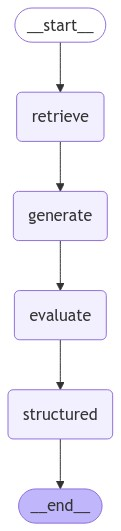

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
domain="health"
candidates="namal rajapaksha, sajith premadasa and anura kumara dissanayake"



for event in graph.stream({"domain": domain, "candidates": candidates}):
    for value in event.values():
      print(value)

{'documents': [Document(id='37af4325-bef5-419d-a2f3-ddef3eb6048b', metadata={'page': 22.0, 'source': '/content/Sajith_manifesto_english.pdf'}, page_content='to promote active lifestyles and combat \nsedentary behavior.\n• The expansion of care facilities for the \nelderly and those with chronic diseases \nis a priority to enhance their well-being \nand quality of life.\n• A full medical test will be conducted \nwith state contribution once every 3 \nyears for every citizen over 40 years of \nage targeting minimization of the state \nhealthcare expenses through early \ndiagnosis of diseases and creating a \nhealthy generation of citizens. \n• “Husma” programme to improve the \navailability of medical services to the \npeople of Sri Lanka will be top priory \nof our government. A total audit of the \nentire health services network shall \nbe undertaken to allocate fund over a \nperiod of time to meet global quality \nstandards. Encourage donors to continue \nfunding the “Husma” programme

In [ ]:
score.split('\n')

['NPP: 8/10', '.', 'NAMAL: 7/10', '.', 'Sajith: 9/10']